In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA, NMF

from luwiji.dimensionality_reduction import illustration

C:\Users\Tes\miniconda3\envs\jcop_usl\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Tes\miniconda3\envs\jcop_usl\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_csv("data/lfw_people.csv")
df.head()

,pixel_1-1,pixel_1-2,pixel_1-3,pixel_1-4,pixel_1-5,pixel_1-6,pixel_1-7,pixel_1-8,pixel_1-9,pixel_1-10,...,pixel_87-57,pixel_87-58,pixel_87-59,pixel_87-60,pixel_87-61,pixel_87-62,pixel_87-63,pixel_87-64,pixel_87-65,name
0,57,60,78,120,156,178,195,210,221,222,...,41,17,15,20,19,18,17,16,22,Winona Ryder
1,66,80,88,68,63,96,115,127,139,148,...,25,18,11,8,8,8,8,8,9,Jean Chretien
2,18,14,15,13,14,23,55,92,125,154,...,253,251,240,172,47,20,22,22,25,Carlos Menem
3,76,113,172,201,199,190,177,167,167,171,...,82,115,131,137,136,138,140,143,143,Ariel Sharon
4,79,70,70,81,99,126,144,156,164,168,...,88,91,90,89,85,83,80,74,64,Alvaro Uribe


## Dataset Splitting

In [3]:
X = df.drop(columns="name").values
y = df.name.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2418, 5655), (605, 5655), (2418,), (605,))

## Visualize  Data

(-0.5, 64.5, 86.5, -0.5)

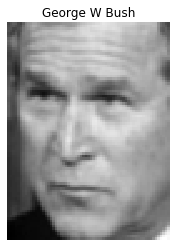

In [7]:
idx = 2
plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

## Decide n_components

Text(0, 0.5, 'Cumulative Explained Variance')

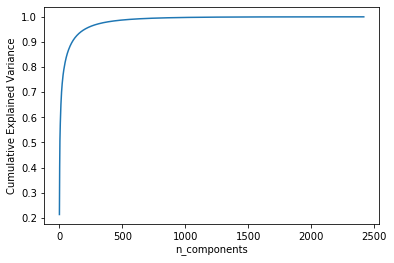

In [12]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")

## Feature Extraction melalui Dim Reduction

In [13]:
pca = PCA(250, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
print(X_train.shape) # hidden layer
print(X_train_pca.shape) # weight / code 
print(pca.components_.shape) # fiture

(2418, 5655)
(2418, 250)
(250, 5655)


## Coba Visualisasi Fiture (Component)nya

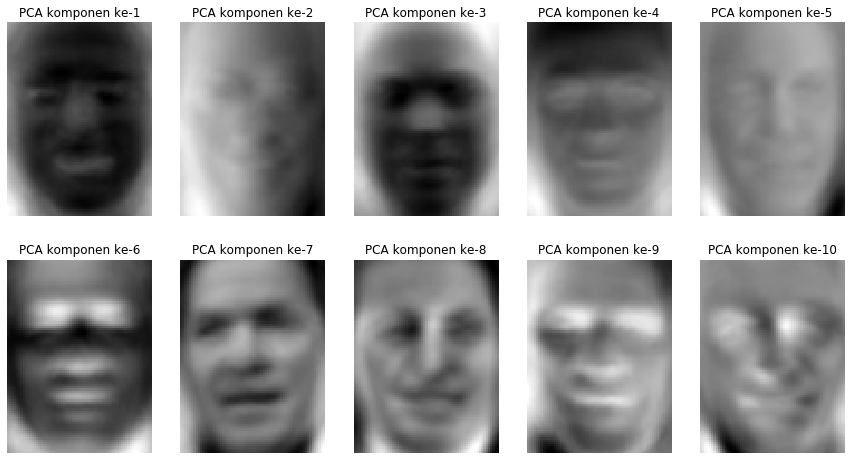

In [16]:
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"PCA komponen ke-{i+1}")
    plt.axis("off")

## Reconstruct Image

In [17]:
X_train_inv = pca.inverse_transform(X_train_pca)

(-0.5, 64.5, 86.5, -0.5)

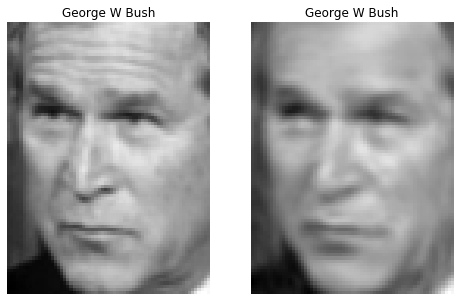

In [18]:
plt.figure(figsize=(8, 5))

plt.subplot(121)
plt.imshow(X_train[2].reshape(87, 65), cmap='gray')
plt.title(y_train[2])
plt.axis("off")

plt.subplot(122)
plt.imshow(X_train_inv[2].reshape(87, 65), cmap='gray')
plt.title(y_train[2])
plt.axis("off")

## Rekonstruksi PCA itu kombinasi Linear

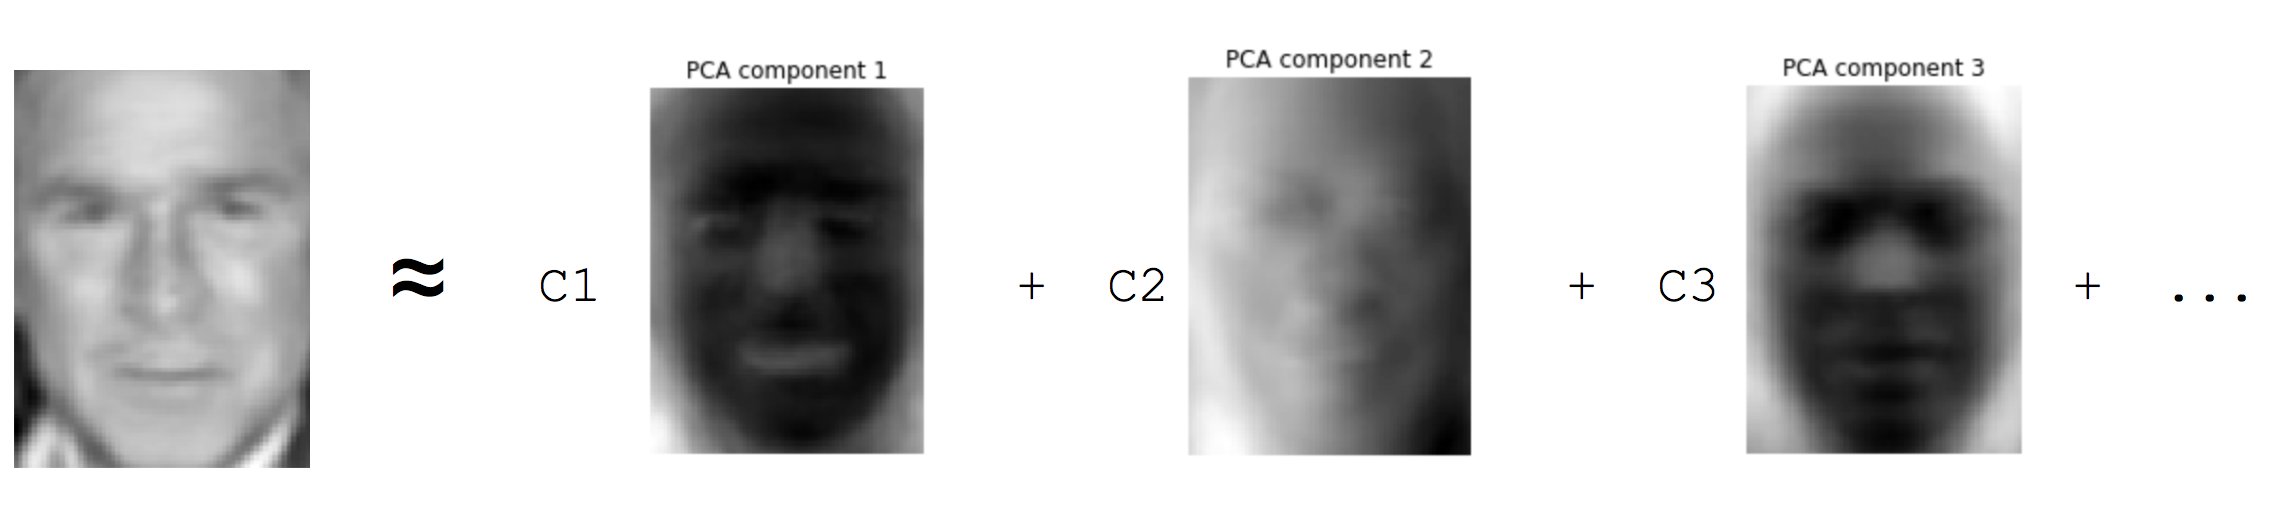

In [19]:
illustration.pca_combination

## Artinya apa? Kita bisa encode wajah orang ? -> Face Verification

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
soekarno1 = plt.imread("data/sample_faces/soekarno1.png").reshape(1, -1)
soekarno2 = plt.imread("data/sample_faces/soekarno2.png").reshape(1, -1)
hatta = plt.imread("data/sample_faces/hatta.png").reshape(1, -1)

In [23]:
pca.transform(soekarno1).shape

(1, 250)

In [24]:
s1 = pca.transform(soekarno1)
s2 = pca.transform(soekarno2)
h1 = pca.transform(hatta)

In [25]:
cosine_similarity(s1, s2)

array([[0.99981886]])

In [26]:
cosine_similarity(s1, h1)

array([[0.99977877]])

In [27]:
cosine_similarity(s1, X_train_pca)

array([[ 0.00249887, -0.03688806,  0.02131707, ...,  0.01937217,
         0.03190181, -0.00627646]])

## Iseng: Cari Wajah yang paling mirip dengan Soekarno

In [32]:
sim = cosine_similarity(s1, X_test_pca)

In [33]:
sim.argsort()

array([[213, 154, 450, 148, 265, 439, 413, 418, 177, 203, 196,  69, 393,
        315, 116, 571, 340, 457, 254,  54, 210,  31, 415, 242, 479,  21,
        362,   7,   5, 476, 533, 138, 240, 231,  59, 310, 416,  88, 578,
         98,  34, 534, 178,  44, 189,  49,  26, 602,  13, 217, 422, 179,
        514, 367, 184, 467, 199, 106, 507, 211, 389, 281, 218,  91,  19,
        273, 320, 252, 530, 163, 401, 592, 338,  18, 589, 555, 150, 372,
        429, 563, 311, 584,  89, 183, 130, 400, 200, 378, 351, 405, 371,
         43, 114, 369, 595, 186, 325, 215, 144, 253, 384, 162, 293, 304,
        291, 596, 408, 544, 124, 539, 548, 246, 433, 347, 305, 477, 523,
        165, 284, 379, 377, 140, 234, 537, 410, 271,  78, 492, 570, 365,
        454, 385, 352, 524, 529, 343, 300, 580, 493, 175, 241, 202,  63,
         81,  45, 374, 121,  50, 307, 518, 224, 131, 573, 243, 472, 191,
        286, 263, 145, 521, 471, 334, 603, 468, 585, 308, 129, 264,  72,
        294, 301, 552, 330,  17, 504, 567, 357, 149

(-0.5, 64.5, 86.5, -0.5)

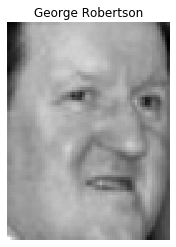

In [31]:
idx = 213
plt.imshow(X_train[idx].reshape(87, 65), cmap='gray')
plt.title(y_train[idx])
plt.axis('off')

## iseng2

In [70]:
a = X_train_inv.mean(axis=1)

In [71]:
a.shape

(2418,)

In [74]:
X_train_inv.shape

(2418, 5655)

(-0.5, 64.5, 86.5, -0.5)

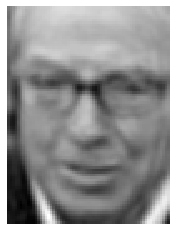

In [73]:
plt.imshow(X_train_inv[1].reshape(87, 65), cmap='gray')
plt.axis("off")

## Other Alternative -> Non-Negative Matrix Factorization

Selain SVD, terdapat metode faktorisasi lain yang disebut NMF.
Dulu dikenal sebagai Positive Matrix Factorization, tapi sekarang lebih dikenal sebagai Nnon-Negative Matrix Factorization 
SVD mencari orthogonal dengan menggunakan kombinasi linear dari fitur sedangkan NMF memaksa nilainya untuk tidak negatif. Kelebihan NMF:

- nilai yang positif(cocok untuk image)
- komponen yang dihasilkan biasanya lebih mudah diinterpretasi (karena semua positif, menghindari nilai yang cancel ing)

In [36]:
nmf = NMF(250)
X_train_nmf = nmf.fit_transform(X_train)
x_test_nmf = nmf.transform(X_test)



ValueError: num must be 1 <= num <= 15, not 0

<Figure size 1080x144 with 0 Axes>

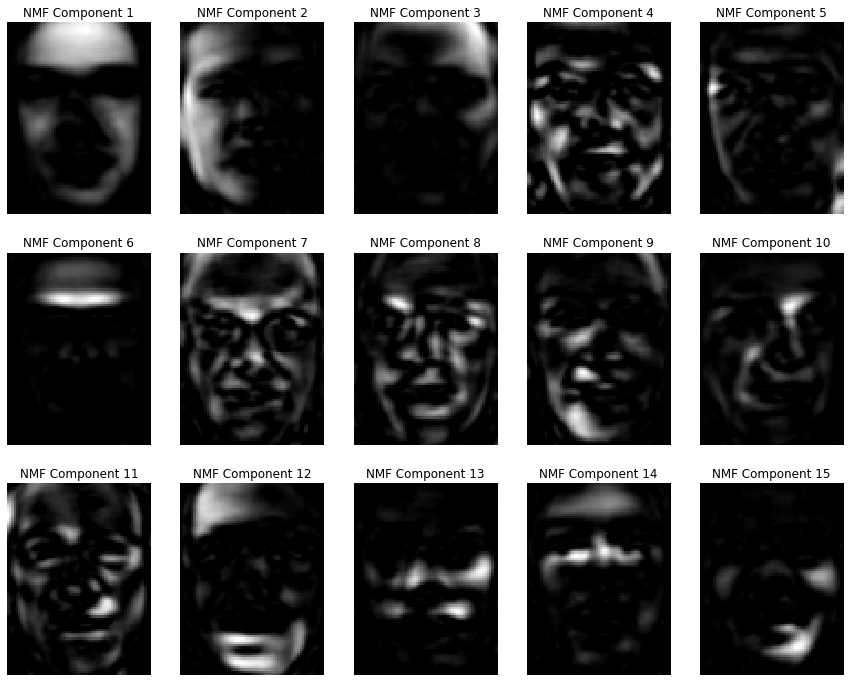

In [39]:
plt.figure(figsize=(15,12))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(nmf.components_[i].reshape(87, 65), cmap='gray')
    plt.title(f"NMF Component {i+1}")
    plt.axis("off")

In [40]:
s1 = nmf.transform(soekarno1)
s2 = nmf.transform(soekarno2)
h1 = nmf.transform(hatta)

In [41]:
cosine_similarity(s1, s2)

array([[0.69374732]])

In [43]:
cosine_similarity(s2, h1)

array([[0.74012862]])